In [4]:
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt 
import string
import os
from PIL import Image
import glob
from pickle import dump, load
from tqdm import tqdm_notebook as tqdm
from time import time
from keras.preprocessing import sequence
from keras.models import load_model
from keras.models import Sequential
from keras.layers import LSTM, Embedding, TimeDistributed, Dense, RepeatVector,\
                         Activation, Flatten, Reshape, concatenate, Dropout, BatchNormalization
from keras.optimizers import Adam, RMSprop
from keras.layers.wrappers import Bidirectional
from keras.layers.merge import add
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras import Input, layers
from keras import optimizers
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

try:
    import dill as pickle
except ImportError:
    import pickle

In [5]:
try:
    import dill as pickle
except ImportError:
    import pickle

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# load doc into memory
def load_doc(filename): 
    file = open(filename, 'r') 
    text = file.read() 
    file.close()
    return text

base_dir = "/content/drive/My Drive/MB/"
dataset_dir = "/content/drive/My Drive/"

In [8]:
model = load_model(base_dir + 'clean_model_39.h5')

In [17]:
# Loading Image Features
train_features = load(open(base_dir + "encoded_train_images.pkl", "rb"))
print('Photos: train=%d' % len(train_features))
# Loading Image Features
test_features = load(open(base_dir + "encoded_test_images.pkl", "rb"))
print('Photos: test=%d' % len(test_features))
# Loading descriptions 
descriptions = load(open(base_dir + "descriptions_text.pkl", "rb"))

Photos: train=6000
Photos: test=1000


In [10]:
# Loading wordtoix
wordtoix = load(open(base_dir + "wordtoix.pkl", "rb"))
print('Wordtoix Length = %d' % len(wordtoix))

Wordtoix Length = 2063


In [11]:
ixtoword = {}
for word, i in wordtoix.items():
    ixtoword[i] = word

In [12]:
Directory_path = dataset_dir + 'Flickr8k_Dataset/Flicker8k_Dataset/'

In [13]:
def greedySearch(photo):
    in_text = 'startseq'
    for i in range(max_length):
        sequence = [wordtoix[w] for w in in_text.split() if w in wordtoix]
        sequence = pad_sequences([sequence], maxlen=max_length)
        yhat = model.predict([photo,sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = ixtoword[yhat]
        in_text += ' ' + word
        if word == 'endseq':
            break
    final = in_text.split()
    final = final[1:-1]
    final = ' '.join(final)
    return final

In [14]:
max_length = 35

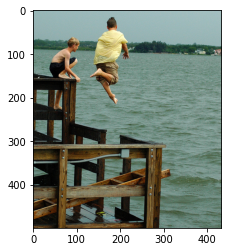

Greedy: man woman sitting railing dock near water
Refs: 
 A boy jumping off of a dock while his friend watches
Two boys are climbing a wooden platform and jumping into a river
Two boys jumping off the pier into the water
Two boys preparing to jump off a pier located on a large body of water
Two children jump off the dock into the lake


In [18]:
z = 73
pic = list(test_features.keys())[z]
image = test_features[pic].reshape((1,2048))
x=plt.imread(Directory_path+pic)
plt.imshow(x)
plt.show()
predicted = greedySearch(image)
print("Greedy:",predicted)
print("Refs: \n", '\n'.join(descriptions[pic.split('.')[0]]))

In [16]:
from tqdm.notebook import tqdm

train_predictions = {img_id: greedySearch(img_features.reshape((1, 2048))) for img_id, img_features in tqdm(train_features.items())}
pickle.dump(train_predictions, open(base_dir + 'train_predictions.pkl', 'wb'))

test_predictions = {img_id: greedySearch(img_features.reshape((1, 2048))) for img_id, img_features in tqdm(test_features.items())}
pickle.dump(test_predictions, open(base_dir + 'test_predictions.pkl', 'wb'))
